In [1]:
# Uncomment this if you have CUDA and want to specify the device:
# import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import glob
import json

import cv2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torchvision
import tqdm
import PIL
from PIL import Image

In [3]:
def show_image(image, figsize=(16, 9), reverse=True):
    plt.figure(figsize=figsize)
    if reverse:
        plt.imshow(image[..., ::-1])
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()

def save_to_json(filename, data):
    with open(filename, 'w') as f:
        return json.dump(data, f)

def load_from_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Load COCO info

Useful links:
http://cocodataset.org/#home

In [5]:
coco_id_to_name = load_from_json("coco_id_to_name.json")

In [6]:
coco_id_to_name = {int(key): value for key, value in coco_id_to_name.items()}

In [7]:
len(coco_id_to_name)

80

In [8]:
list(coco_id_to_name.values())

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

# Sample run

In [9]:
file = "detection_examples/mrs_maisel.jpg"

https://github.com/pytorch/vision/blob/c732dfe2a4b1c861d8d1fedd7999f473f8cd3142/torchvision/models/detection/faster_rcnn.py#L24

In [10]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True, progress=True, num_classes=91, pretrained_backbone=True
)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [11]:
from torchvision import transforms

to_tensor = transforms.ToTensor()

def val_transform(img):
    img_tensor = to_tensor(img)
    return img_tensor.unsqueeze(0)

def visualize_prediction(file, model, device='cuda', verbose=True, thresh=0.0,
                         n_colors=None):
    img = Image.open(file)
    img_tensor = val_transform(img)
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(img_tensor.to(device))  # list of size 1
    prediction = predictions[0]

    if n_colors is None:
        n_colors = model.roi_heads.box_predictor.cls_score.out_features

    palette = sns.color_palette(None, n_colors)

    # visualize
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    for i in range(len(prediction["boxes"])):
        x1, x2, x3, x4 = map(int, prediction["boxes"][i].tolist())
        label = int(prediction["labels"][i].cpu())
        score = float(prediction["scores"][i].cpu())
        name = coco_id_to_name[label]
        color = palette[label]
        if verbose:
            if score > thresh:
                print ("Class: {}, Confidence: {}".format(name, score))
        if score > thresh:
            image = cv2.rectangle(img, (x1, x2), (x3, x4),
                                  np.array(color) * 255, 2)
            cv2.putText(image, name, (x1, x2-10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.7, np.array(color) * 255, 2)
    show_image(image)
    return prediction

In [12]:
file

'detection_examples/mrs_maisel.jpg'

In [13]:
img = Image.open(file)

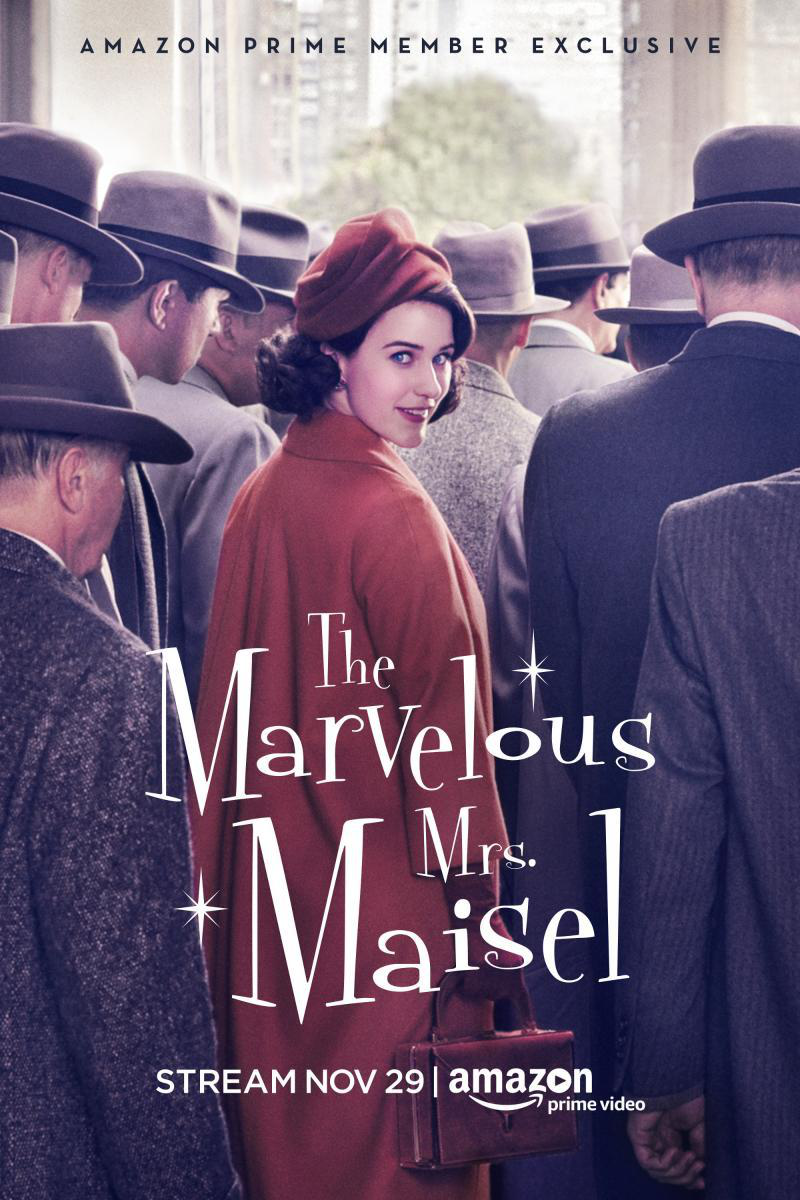

In [14]:
img

Class: person, Confidence: 0.9956188797950745
Class: person, Confidence: 0.9719011187553406
Class: person, Confidence: 0.9708346128463745
Class: person, Confidence: 0.952089250087738
Class: person, Confidence: 0.9492106437683105
Class: person, Confidence: 0.9448843598365784
Class: person, Confidence: 0.9257946014404297
Class: person, Confidence: 0.8480139970779419
Class: person, Confidence: 0.7299485206604004
Class: person, Confidence: 0.638762354850769
Class: tie, Confidence: 0.5950097441673279
Class: person, Confidence: 0.48712676763534546
Class: person, Confidence: 0.43352386355400085
Class: chair, Confidence: 0.4026193618774414
Class: person, Confidence: 0.39921191334724426
Class: person, Confidence: 0.39902254939079285
Class: person, Confidence: 0.3596392273902893
Class: person, Confidence: 0.3151039481163025
Class: person, Confidence: 0.3116186857223511
Class: person, Confidence: 0.30801892280578613
Class: person, Confidence: 0.27895742654800415
Class: person, Confidence: 0.26135

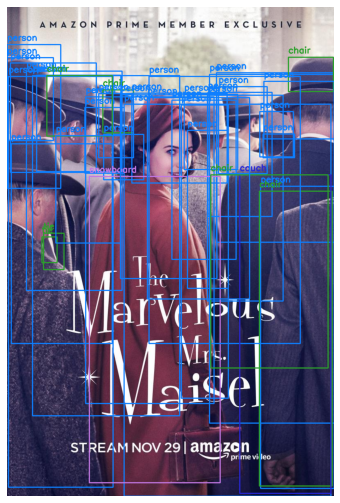

In [15]:
out = visualize_prediction(file, model, device=device)

Class: person, Confidence: 0.9956188797950745
Class: person, Confidence: 0.9719011187553406
Class: person, Confidence: 0.9708346128463745
Class: person, Confidence: 0.952089250087738
Class: person, Confidence: 0.9492106437683105
Class: person, Confidence: 0.9448843598365784
Class: person, Confidence: 0.9257946014404297
Class: person, Confidence: 0.8480139970779419


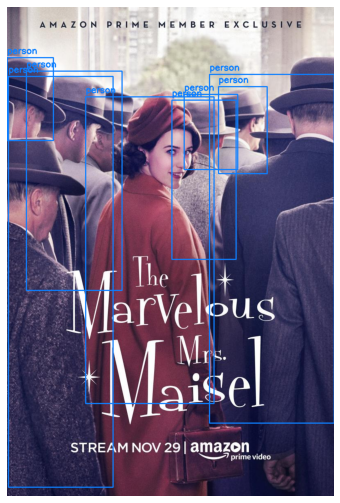

In [16]:
out = visualize_prediction(file, model, thresh=0.8, device=device)

# Another sample run

In [17]:
file = 'detection_examples/junk_food.jpg'

Class: person, Confidence: 0.9768175482749939
Class: person, Confidence: 0.9621938467025757
Class: person, Confidence: 0.9575481414794922
Class: person, Confidence: 0.9556086659431458
Class: person, Confidence: 0.8266400098800659
Class: sandwich, Confidence: 0.8228334784507751
Class: hot dog, Confidence: 0.8058623671531677
Class: person, Confidence: 0.5006353259086609
Class: sandwich, Confidence: 0.4936717748641968
Class: person, Confidence: 0.48630672693252563
Class: bowl, Confidence: 0.4468264877796173
Class: person, Confidence: 0.4429796040058136
Class: cake, Confidence: 0.2984049916267395
Class: sandwich, Confidence: 0.26898112893104553
Class: cup, Confidence: 0.24261310696601868
Class: person, Confidence: 0.22883759438991547
Class: dining table, Confidence: 0.21246035397052765
Class: cell phone, Confidence: 0.20239867269992828
Class: person, Confidence: 0.17625732719898224
Class: cell phone, Confidence: 0.1737309694290161
Class: sandwich, Confidence: 0.16650943458080292
Class: hot

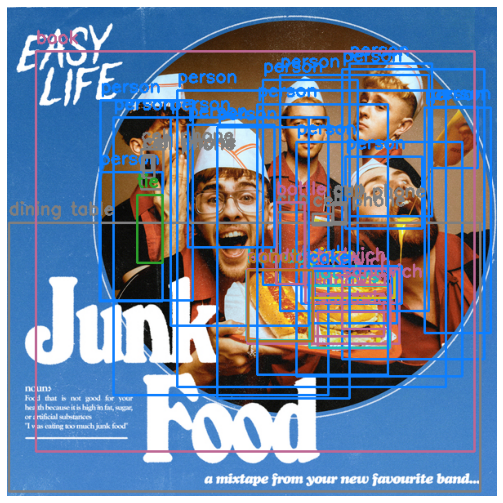

In [18]:
out = visualize_prediction(file, model, device=device)

Class: person, Confidence: 0.9768175482749939
Class: person, Confidence: 0.9621938467025757
Class: person, Confidence: 0.9575481414794922
Class: person, Confidence: 0.9556086659431458
Class: person, Confidence: 0.8266400098800659
Class: sandwich, Confidence: 0.8228334784507751
Class: hot dog, Confidence: 0.8058623671531677


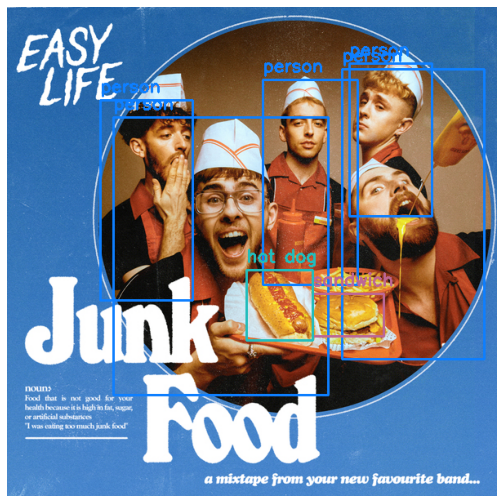

In [19]:
out = visualize_prediction(file, model, thresh=0.8, device=device)

Class: person, Confidence: 0.9768175482749939
Class: person, Confidence: 0.9621938467025757
Class: person, Confidence: 0.9575481414794922
Class: person, Confidence: 0.9556086659431458
Class: person, Confidence: 0.8266400098800659
Class: sandwich, Confidence: 0.8228334784507751
Class: hot dog, Confidence: 0.8058623671531677
Class: person, Confidence: 0.5006353259086609
Class: sandwich, Confidence: 0.4936717748641968
Class: person, Confidence: 0.48630672693252563
Class: bowl, Confidence: 0.4468264877796173
Class: person, Confidence: 0.4429796040058136


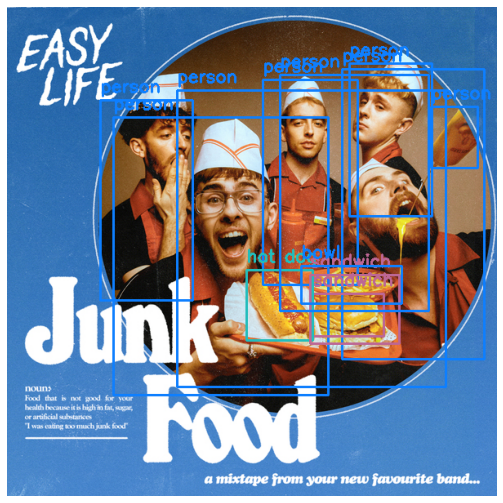

In [20]:
out = visualize_prediction(file, model, thresh=0.4, device=device)

In [21]:
list(coco_id_to_name.values())

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

# Finetuning the model for license plates detection

## Open Images dataset
https://storage.googleapis.com/openimages/web/index.html

In [22]:
filename_to_bbox_train_dict = load_from_json("filename_to_bbox_train.json")

In [23]:
filename_to_bbox_val_dict = load_from_json("filename_to_bbox_val.json")

In [24]:
len(filename_to_bbox_train_dict), len(filename_to_bbox_val_dict)

(1313, 200)

## Visualize dataset

In [25]:
def visualize_from_dataset(file, filename_to_bbox_dict):
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    for i in range(len(filename_to_bbox_dict[file])):
        x_min, x_max, y_min, y_max = filename_to_bbox_dict[file][i]
        x_min, y_min, x_max, y_max = int(x_min * w), int(y_min * h), \
                                     int(x_max * w), int(y_max * h)
        image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max),
                              (0, 255, 0), 2)
    show_image(image)

In [26]:
train_filenames = list(filename_to_bbox_train_dict.keys())

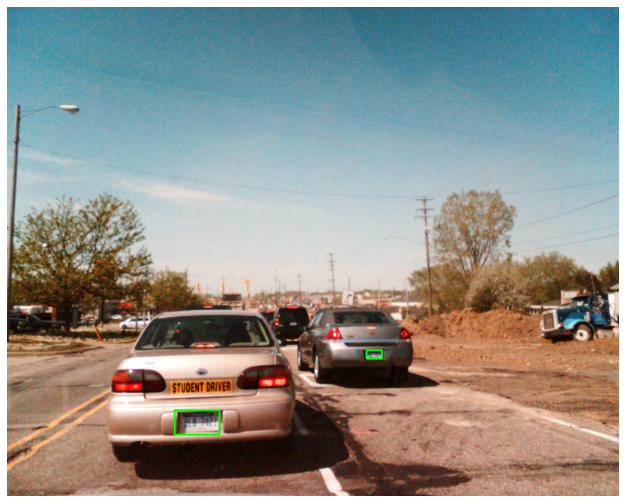

In [27]:
filename = np.random.choice(train_filenames)
visualize_from_dataset(filename, filename_to_bbox_train_dict)

In [28]:
val_filenames = list(filename_to_bbox_val_dict.keys())

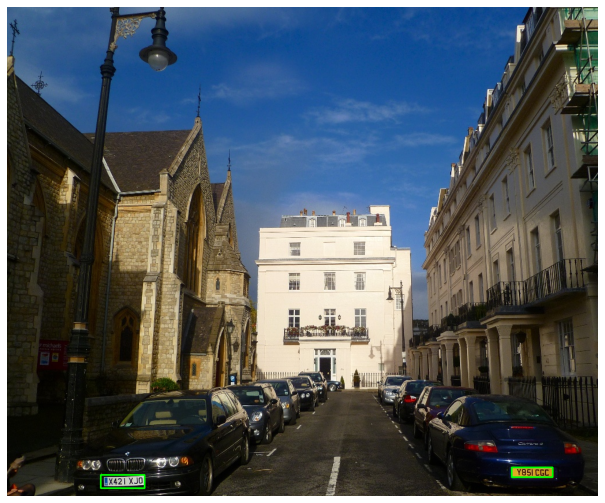

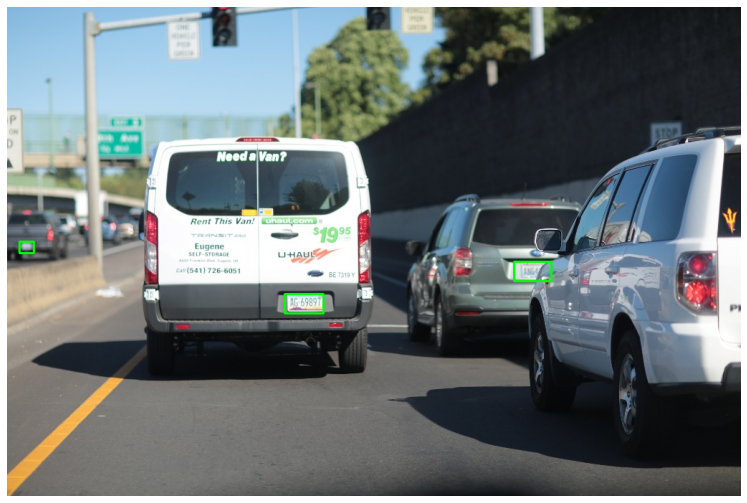

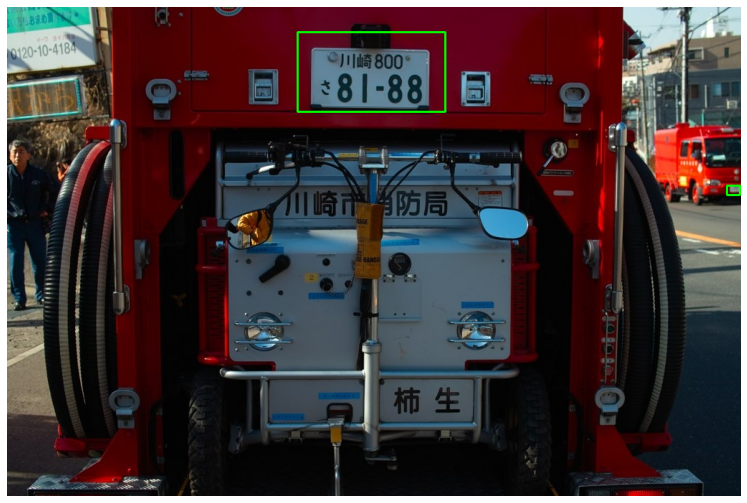

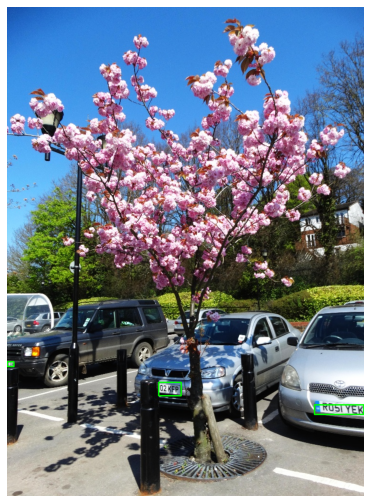

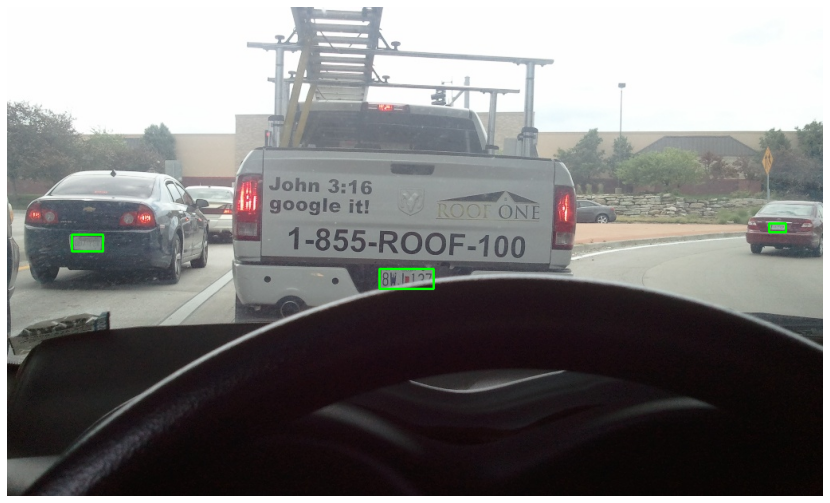

In [29]:
for filename in np.random.choice(val_filenames, 5):
    visualize_from_dataset(filename, filename_to_bbox_val_dict)

## Create Dataset class

In [30]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import json
from torchvision import transforms


class DetectionDataset(torch.utils.data.Dataset):
    def __init__(self, data_dict_file, transforms=None):
        self.transforms = transforms

        with open(data_dict_file, 'r') as f:
            self.data_dict = json.load(f)

        self.imgs = list(self.data_dict.keys())

    def __getitem__(self, idx):
        # load images and masks
        img_path = self.imgs[idx]
        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        num_objs = len(self.data_dict[img_path])
        boxes = []
        for i in range(num_objs):
            bbox = self.data_dict[img_path][i]
            xmin = bbox[0] * w
            xmax = bbox[1] * w
            ymin = bbox[2] * h
            ymax = bbox[3] * h
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        # is crowd (background class)
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)

## Create transforms

In [31]:
img_transforms = transforms.Compose([
    transforms.ToTensor()
])

## Load datasets

In [32]:
# collate_fn needed for batch:
def collate_fn(batch):
    return tuple(zip(*batch))

In [33]:
# Use our dataset and defined transformations:
train_dataset = DetectionDataset("filename_to_bbox_train.json", img_transforms)
val_dataset = DetectionDataset("filename_to_bbox_val.json", img_transforms)

## Make dataloaders

In [34]:
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=4, shuffle=True, num_workers=4,
    collate_fn=collate_fn, drop_last=True
)

data_loader_val = torch.utils.data.DataLoader(
    val_dataset, batch_size=4, shuffle=False, num_workers=1,
    collate_fn=collate_fn, drop_last=False
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Load model

In [35]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [36]:
# Once again about the final box predictor:
model.roi_heads.box_predictor

FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=91, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
)

In [37]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Load the model pre-trained on COCO:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True, pretrained_backbone=True
)

# Changing head for our task:
num_classes = 2
in_channels = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(
    in_channels=in_channels, num_classes=num_classes
)

In [38]:
assert model.roi_heads.box_predictor.cls_score.in_features == 1024
assert model.roi_heads.box_predictor.cls_score.out_features == 2
assert model.roi_heads.box_predictor.bbox_pred.out_features == 8

## Enable training for the region-proposal net and the head

In [39]:
# Move model to the right device:
model.to(device)

for param in model.parameters():
    param.requires_grad = False

for param in model.roi_heads.box_predictor.parameters():
    param.requires_grad = True

# Construct an optimizer...
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

In [40]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

roi_heads.box_predictor.cls_score.weight
roi_heads.box_predictor.cls_score.bias
roi_heads.box_predictor.bbox_pred.weight
roi_heads.box_predictor.bbox_pred.bias


In [41]:
# ...and a learning rate scheduler which decreases the learning rate
# by 10x every 3 epochs:
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer, step_size=30, gamma=0.1
)

## Training loop

In [42]:
from engine import evaluate

During training our model's output looks like this:

```
loss_dict = model(images, targets)

print (loss_dict)

{
    'loss_classifier':
        tensor(1.5606, device='cuda:0', grad_fn=<NllLossBackward>),
    'loss_box_reg':
        tensor(0.0043, device='cuda:0', grad_fn=<DivBackward0>),
    'loss_objectness':
        tensor(2.0158, device='cuda:0'),
    'loss_rpn_box_reg':
        tensor(1.4645, device='cuda:0')
}
 ```

In [43]:
import math
import sys
import time
import torch

from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import utils

def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq):
    model.train()
    metric_logger = utils.MetricLogger(delimiter="  ")
    metric_logger.add_meter("lr", utils.SmoothedValue(
        window_size=1, fmt="{value:.6f}"
    ))
    header = "Epoch: [{}]".format(epoch)

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1. / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = utils.warmup_lr_scheduler(optimizer,
                                                 warmup_iters,
                                                 warmup_factor)

    for images, targets in metric_logger.log_every(data_loader, print_freq,
                                                   header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Get model predictions (a dictionary)
        # and summarize them:
        loss_dict = model(images, targets)
        losses = sum(value for value in loss_dict.values())
        loss_value = losses.item()

        if not math.isfinite(loss_value):
            print("Loss is {}, stopping training.".format(loss_value))
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses, **loss_dict)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

## Begin training

In [44]:
num_epochs = 2

for epoch in range(num_epochs):
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=50)
    # Update the learning rate:
    lr_scheduler.step()
    # Evaluate on the test dataset:
    evaluate(model, data_loader_val, device=device)
    torch.save(model.state_dict(), "model_state_dict_last.pth")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [0]  [  0/328]  eta: 0:07:17  lr: 0.000020  loss: 1.9825 (1.9825)  loss_classifier: 0.7010 (0.7010)  loss_box_reg: 0.0159 (0.0159)  loss_objectness: 0.9699 (0.9699)  loss_rpn_box_reg: 0.2958 (0.2958)  time: 1.3340  data: 0.5636  max mem: 2036
Epoch: [0]  [ 50/328]  eta: 0:03:06  lr: 0.000784  loss: 0.6661 (1.1614)  loss_classifier: 0.0370 (0.2017)  loss_box_reg: 0.0048 (0.0100)  loss_objectness: 0.5601 (0.8063)  loss_rpn_box_reg: 0.0589 (0.1433)  time: 0.6574  data: 0.0153  max mem: 2923
Epoch: [0]  [100/328]  eta: 0:02:30  lr: 0.001548  loss: 1.1864 (1.1296)  loss_classifier: 0.0344 (0.1210)  loss_box_reg: 0.0066 (0.0091)  loss_objectness: 0.9209 (0.8497)  loss_rpn_box_reg: 0.1231 (0.1498)  time: 0.6318  data: 0.0171  max mem: 2923
Epoch: [0]  [150/328]  eta: 0:01:57  lr: 0.002312  loss: 0.9954 (1.1013)  loss_classifier: 0.0284 (0.0949)  loss_box_reg: 0.0084 (0.0124)  loss_objectness: 0.7271 (0.8495)  loss_rpn_box_reg: 0.0905 (0.1445)  time: 0.6359  data: 0.0171  max mem: 2923


## Save model

In [45]:
torch.save(model.state_dict(), "model_state_dict_workshop_final.pth")

## Load saved model

In [46]:
model.load_state_dict(torch.load("model_state_dict_final.pth"))

<All keys matched successfully>

In [47]:
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [48]:
evaluate(model, data_loader_val, device=device)

creating index...
index created!
Test:  [ 0/50]  eta: 0:00:41  model_time: 0.5999 (0.5999)  evaluator_time: 0.0077 (0.0077)  time: 0.8246  data: 0.2058  max mem: 3186
Test:  [49/50]  eta: 0:00:00  model_time: 0.6583 (0.6655)  evaluator_time: 0.0064 (0.0067)  time: 0.7149  data: 0.0166  max mem: 3186
Test: Total time: 0:00:35 (0.7031 s / it)
Averaged stats: model_time: 0.6583 (0.6655)  evaluator_time: 0.0064 (0.0067)
Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.370
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.783
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.293
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.517
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.443
 Average Recall     (AR) @[ IoU=

## Visualize validation predictions

In [49]:
def visualize_prediction_plate(file, model, device='cuda', verbose=True,
                               thresh=0.0, n_colors=None, id_to_name=None):
    img = Image.open(file)
    img_tensor = val_transform(img)
    model.to(device)
    model.eval()
    with torch.no_grad():
        predictions = model(img_tensor.to(device))  # list of size 1
    prediction = predictions[0]

    if n_colors is None:
        n_colors = model.roi_heads.box_predictor.cls_score.out_features

    palette = sns.color_palette(None, n_colors)

    # visualize
    img = cv2.imread(file, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]
    image = img
    for i in range(len(prediction["boxes"])):
        x_min, y_min, x_max, y_max = map(int, prediction["boxes"][i].tolist())
        label = int(prediction["labels"][i].cpu())
        score = float(prediction["scores"][i].cpu())
        name = id_to_name[label]
        color = palette[label]
        if verbose:
            if score > thresh:
                print ("Class: {}, Confidence: {}".format(name, score))
        if score > thresh:
            image = cv2.rectangle(img, (x_min, y_min), (x_max, y_max),
                                  np.array(color) * 255, 2)
            cv2.putText(image, name, (x_min, y_min-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, np.array(color) * 255, 2)
    show_image(image)
    return prediction

## Visualize predictions

In [50]:
val_filenames = list(filename_to_bbox_val_dict.keys())

Class: plate, Confidence: 0.9889439344406128
Class: plate, Confidence: 0.9794052839279175
Class: plate, Confidence: 0.967624306678772


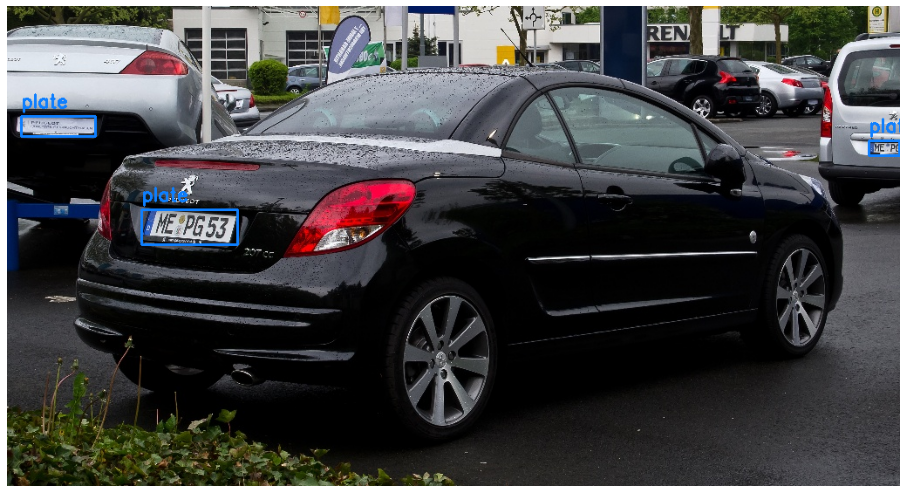

{'boxes': tensor([[ 988.3288,  154.6828, 1023.8049,  171.1619],
         [ 154.6629,  233.8044,  264.5064,  273.8590],
         [  16.3795,  126.2749,  101.6605,  149.2390],
         [  52.9688,  226.6389,   70.6304,  241.0657],
         [ 845.1899,  101.7334,  856.1407,  108.1323],
         [1010.4150,  119.4323, 1021.6206,  133.5587],
         [   6.2202,  224.9310,   68.3054,  244.3665],
         [ 144.6114,  226.3177,  290.1546,  303.2219],
         [ 354.1401,  249.3324,  434.2936,  278.0571],
         [  60.7379,  223.5496,  107.6344,  244.1471],
         [ 157.7634,  232.4387,  209.3549,  266.4866],
         [ 111.9672,  260.5018,  370.6145,  372.2288]], device='cuda:0'),
 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
 'scores': tensor([0.9889, 0.9794, 0.9676, 0.4825, 0.2733, 0.2585, 0.1591, 0.1528, 0.1412,
         0.0905, 0.0568, 0.0547], device='cuda:0')}

In [51]:
filename = np.random.choice(val_filenames)
visualize_prediction_plate(filename, model, id_to_name={1: "plate"}, thresh=0.5)

# Useful links

Next week we'll talk about segmentation. Detection models can be finetuned for this task as well.

Here's an example: https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html#

## Facebook AI Research detectron repository

https://github.com/facebookresearch/detectron2